In [14]:
%matplotlib inline
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from qutip import *
import time

<h1 align="center">Two coupled Harmonic oscillators (more general case)</h1> 
<h3 align="center"><a href="https://github.com/chrishalkias/open-oscillator-QuTip"> GitHub repo page</a></h3>

In [15]:
def harmonic_oscillators(N, init_state_1, init_state_2, energy, time):
    
#---dimentionality------(not yet implemented)

#    dimentions = [dims(init_state_1)[0][0], dims(init_state_2)[0][0]]
#    if dimensions[0] == dimensions[1]:
#        N = dims(init_state_1)[0][0]
#    elif dimensions[0] != dimensions[1]:
#        N_1 = dims(init_state_1)[0][0]
#        N_2 = dims(init_state_2)[0][0]
        
#---states------    
    rho_state_1 = init_state_1 * init_state_1.dag()  
    rho_state_2 = init_state_2 * init_state_2.dag()
    total_state = tensor(init_state_1, init_state_2) 
    
#---Operators & Hamiltonian------

    a = destroy(N)
    a_n = [tensor(a, qeye(N)), tensor(qeye(N), a), energy[2]]
    interaction = tensor(a.dag(), a) + tensor(a, a.dag())
    Hamiltonian = energy[0] * (a_n[0] * a_n[0].dag()) + energy[1] * (a_n[1] * a_n[1].dag()) + energy[2] * interaction
    
#---timelist & solver------

    tlist = np.linspace(0, 10, time)
    result = mesolve(Hamiltonian, total_state, tlist, [], [])
    
#---final states & density matrices------

    fin = result.states[-1]
    dmatrix = fin * fin.dag()
    dmatrix_S = dmatrix.ptrace(0) 
    dmatrix_R = dmatrix.ptrace(1) 

#---Expectation values------

    def expectation_values(x,N):
        exp_matrix_s = np.zeros((time,1))
        exp_matrix_b = np.zeros((time,1))                 
        a = destroy(N)
        for i in range(time):                             
            exp_syst_i = result.states[i]                 
            exp_dm = exp_syst_i * exp_syst_i.dag()          
            exp_rdm_s = exp_dm.ptrace(0)                   
            exp_rdm_b = exp_dm.ptrace(1)                   
            exp_matrix_s[i] = expect(a * a.dag(), exp_rdm_s)
            exp_matrix_b[i] = expect(a * a.dag(), exp_rdm_b)
        if x == 0:
            return exp_matrix_s
        elif x == 1:
            return exp_matrix_b
        else:
            raise ValueError()
            
    def expectation_value_plots():
        exp_matrix_sb = [expectation_values(0,N), expectation_values(1,N), expectation_values(1,N) + expectation_values(0,N)
    ]
        i=0
        for i in range(len(exp_matrix_sb)) :
            fig, axes = plt.subplots(1,1)  
            axes.plot(tlist, exp_matrix_sb[i])
            axes.set_xlabel(r'$t$', fontsize=20)
            if i==0:
                axes.set_ylabel(r'$\left<\hat{a} \hat{a}^\dagger\right>_{system}$', fontsize=20);
            elif i==1:
                axes.set_ylabel(r'$\left<\hat{a} \hat{a}^\dagger\right>_{bath}$', fontsize=20);
            else:
                axes.set_ylabel(r'$\left<\hat{a} \hat{a}^\dagger\right>_{combined}$', fontsize=20);
        i +=1
        return 
    
    expectation_value_plots()
    
#---Wigner & fock plots------
    
    plottingstates = [rho_state_1, rho_state_2, dmatrix_S, dmatrix_R]
    for i in range(4):
        plot_wigner_fock_distribution(plottingstates[i])
    
#---Bigger Wigner Plots------
    
    def wigner_plot(state, label):
        xvec = np.arange(-40.,40.)*5./40
        X,Y = np.meshgrid(xvec, xvec)
        W = wigner(state, xvec, xvec)
        fig1 = plt.figure(figsize=(8,6))
        ax = Axes3D(fig1)
        ax.plot_surface(X, Y, W, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
        ax.contour(X, Y, W, 15,zdir='x', offset=-6)
        ax.contour(X, Y, W, 15,zdir='y', offset=6)
        ax.contour(X, Y, W, 15,zdir='z', offset=-0.3)
        ax.set_xlim3d(-6,6)
        ax.set_xlim3d(-6,6)
        ax.set_zlim3d(-0.3,0.4)
        plt.title(label);
        #plt.savefig('wigner.png')
        return
    
    wigner_plot(total_state, r'Wigner function of the initial system state $\hat{\rho}_i$')
    wigner_plot(dmatrix, r'Wigner function of the final system state $\hat{\rho}_i$')
    
    print('Average photon numbers:', '\n\n', 'For t=0', '\n', '<N_1> =',
        expect(a * a.dag(), init_state_1) -1, '\n', '<N_2> = ',
        expect(a * a.dag(), init_state_2) -1, '\n\n' 'For t=', time, '\n',
        '<N_1> =', expect(a * a.dag(), dmatrix_S) -1, '\n', '<N_2> =',
        expect(a * a.dag(), dmatrix_R) -1)

    return 

Average photon numbers: 

 For t=0 
 <N_1> = 1.0000000000000004 
 <N_2> =  1.9999999999999996 

For t= 1000 
 <N_1> = 1.708052687266842 
 <N_2> = 1.2919473127331575


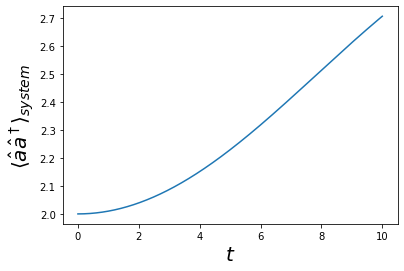

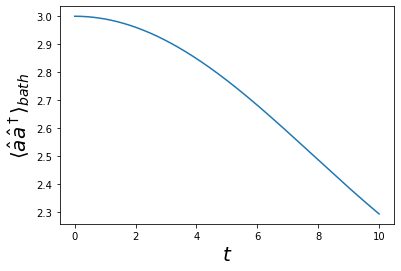

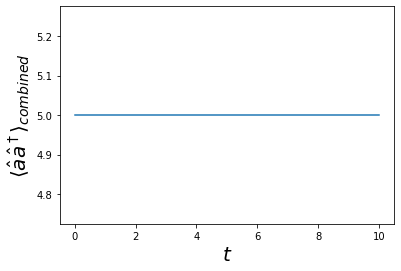

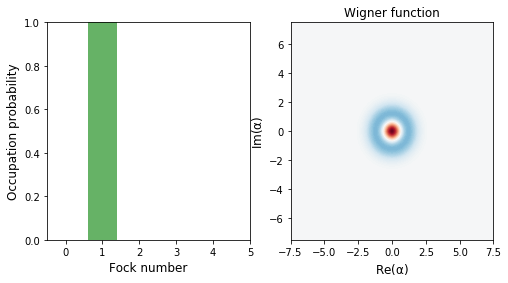

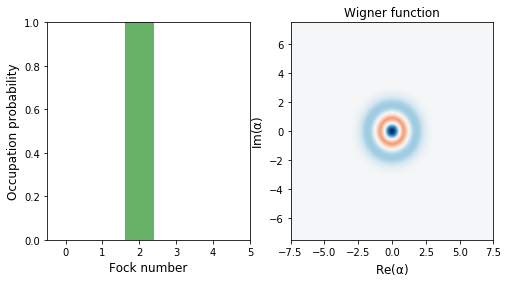

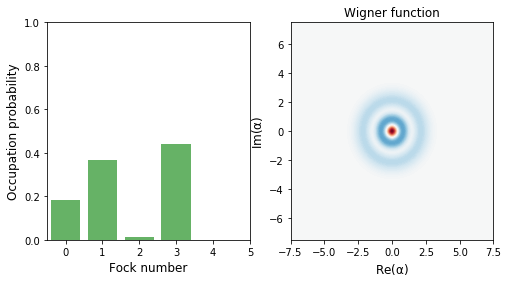

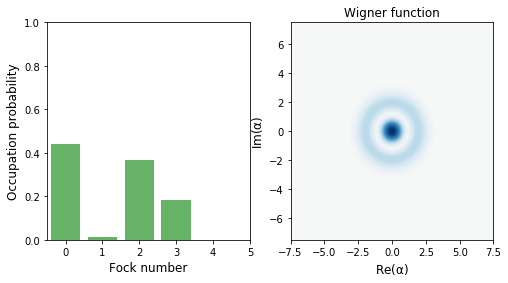

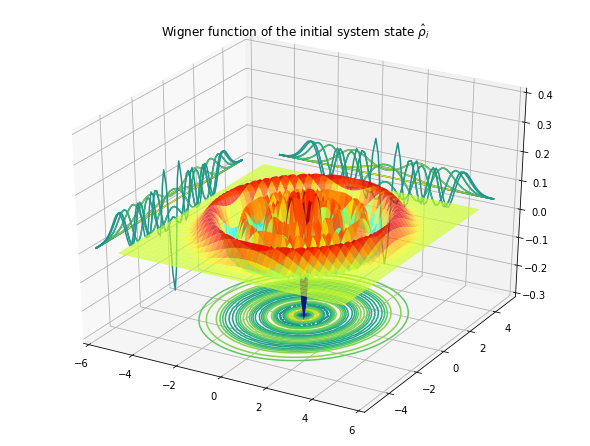

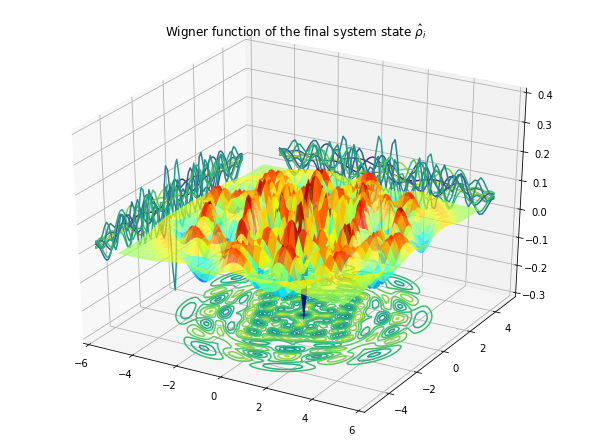

In [16]:
harmonic_oscillators(5, basis(5,1), basis(5,2), [1,1,0.1], 1000)

Average photon numbers: 

 For t=0 
 <N_1> = 0.0 
 <N_2> =  0.9999878243385796 

For t= 1000 
 <N_1> = 0.2958594858511985 
 <N_2> = 0.7038196334477458


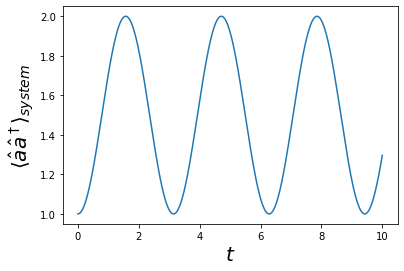

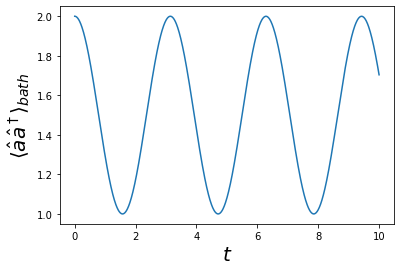

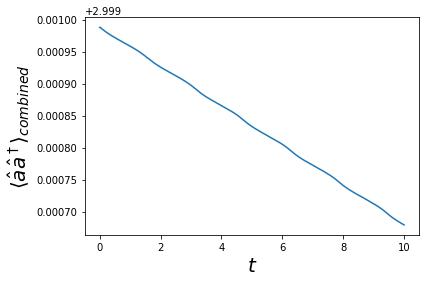

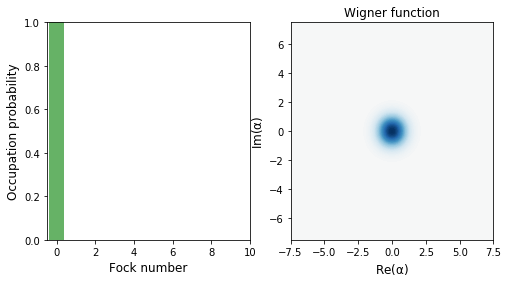

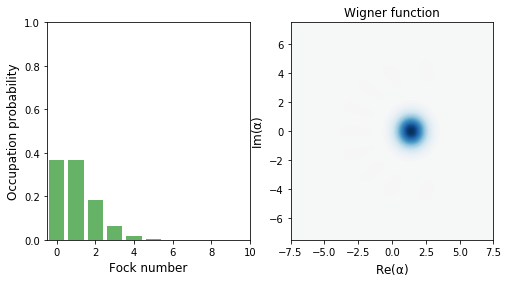

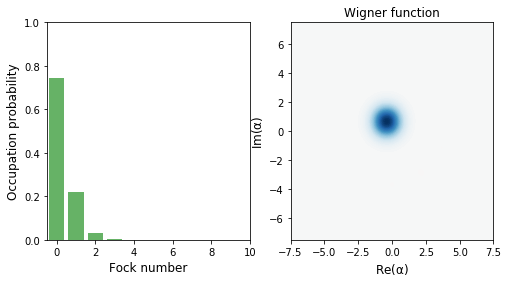

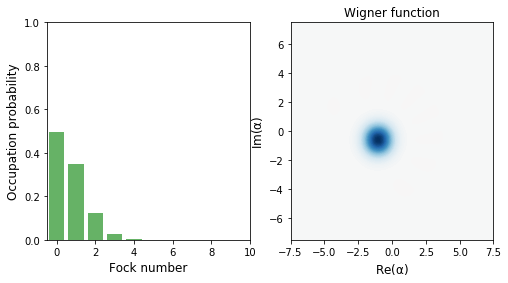

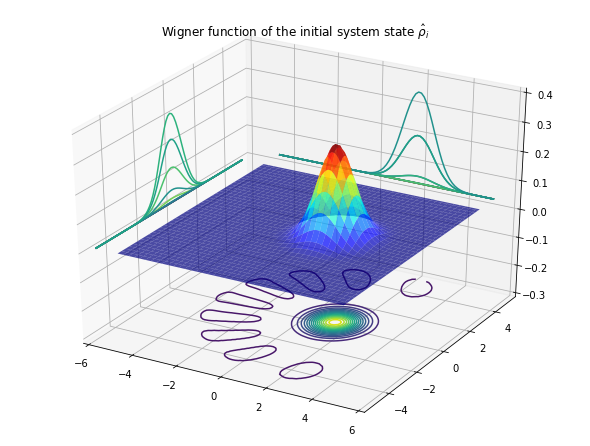

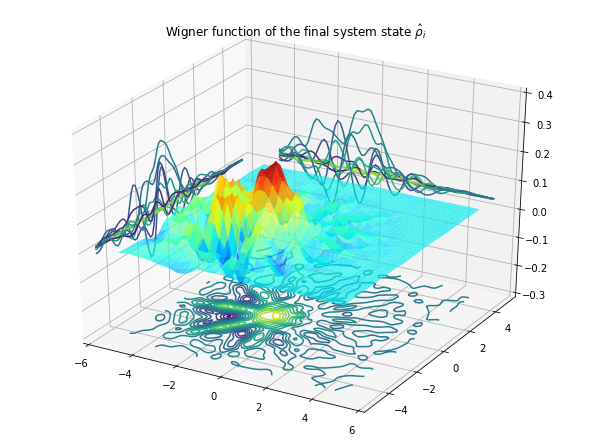

In [17]:
harmonic_oscillators(10, basis(10,0), coherent(10,1), [10,10,1], 1000)

Average photon numbers: 

 For t=0 
 <N_1> = -0.5000000000000001 
 <N_2> =  -0.5000000000000001 

For t= 100 
 <N_1> = -0.5000095861882227 
 <N_2> = -0.5000095861882227


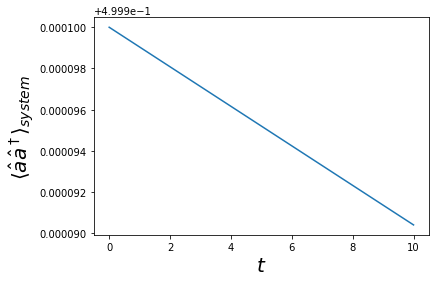

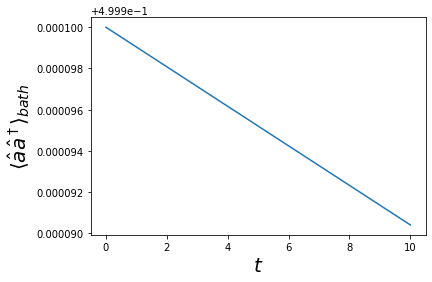

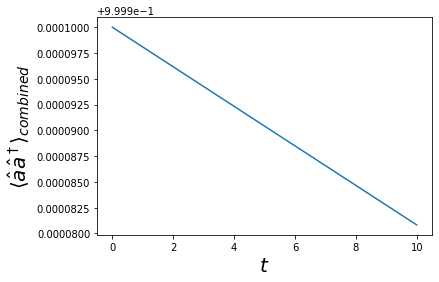

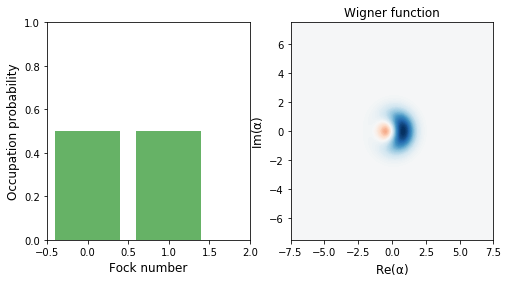

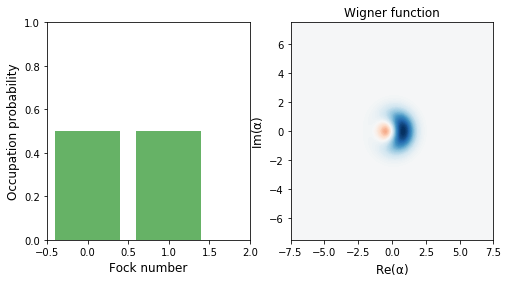

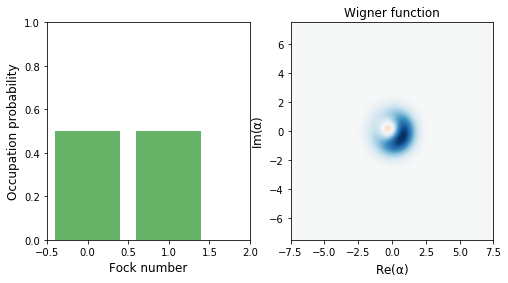

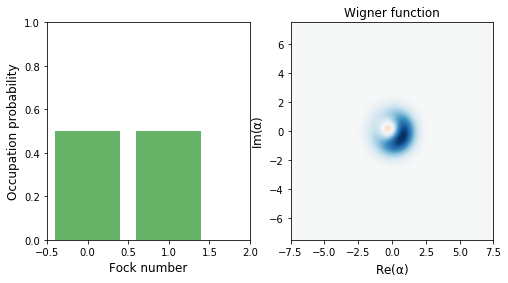

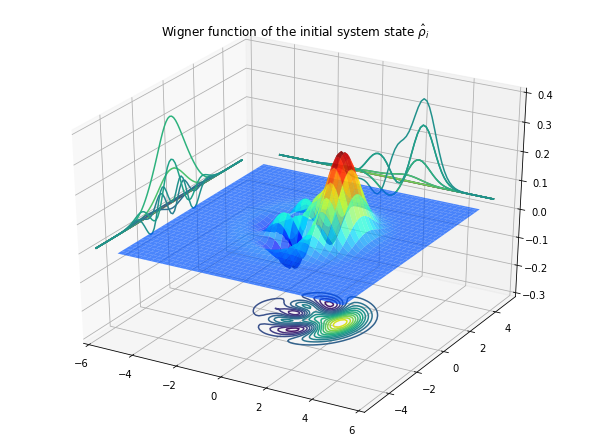

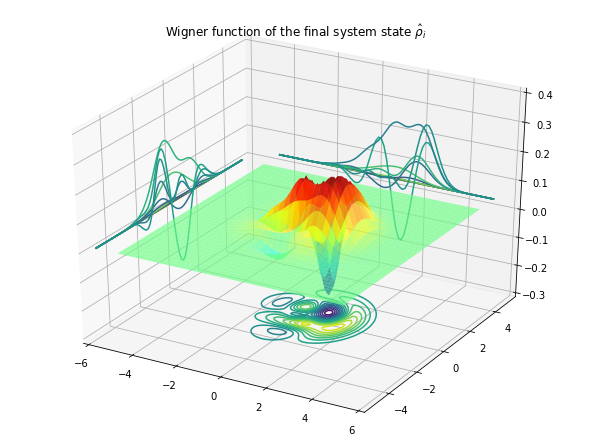

In [18]:
harmonic_oscillators(2, (basis(2,0) + basis(2,1)).unit(), (basis(2,0) + basis(2,1)).unit(), [10,10,0.1], 100)

In [19]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Current admin team: Alexander Pitchford, Paul D. Nation, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, and Eric Giguère.
Project Manager: Franco Nori.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.5.0
Numpy Version:      1.18.1
Scipy Version:      1.4.1
Cython Version:     0.29.17
Matplotlib Version: 3.1.3
Python Version:     3.7.5
Number of CPUs:     2
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/robot/.local/lib/python3.7/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
